# 1.Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# 2.My function

In [6]:
def compare(x,y,plot):
  
  #creating the values by reshaping x 
  X = x.reshape((len(np.array(titanic['pclass'])),1))
  #using this way similar to the linear regression to split data into training and testing
  Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=1)
  #using decision tree classification
  tree_model = tree.DecisionTreeClassifier(max_depth=1) 
  tree_model = tree_model.fit(Xtrain, ytrain)
  tree_model.predict(Xtest)

  metrics.confusion_matrix(ytest,tree_model.predict(Xtest)) 
  tn, fp, fn, tp = metrics.confusion_matrix(ytest,tree_model.predict(Xtest)).ravel()
  tn, fp, fn, tp = metrics.confusion_matrix(ytrain,tree_model.predict(Xtrain)).ravel()
  full_tree_model = tree.DecisionTreeClassifier()
  full_tree_model = full_tree_model.fit(Xtrain, ytrain)

#if the prediction for test is overfitting, then we will change a method

  if abs((full_tree_model.score(Xtrain, ytrain))-full_tree_model.score(Xtest, ytest))>0.1:
    knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
    knn.fit(Xtrain, ytrain)
    print("Overfitting, change a method")
    print(knn.score(Xtrain, ytrain))
    print(knn.score(Xtest,ytest))

#if the prediction is good then we print the result
  elif abs((full_tree_model.score(Xtrain, ytrain))-full_tree_model.score(Xtest, ytest))<=0.1:
    print(full_tree_model.score(Xtrain, ytrain))
    print(full_tree_model.score(Xtest, ytest))

#if the input plot is true then plot the boxplot and ROC plotof X and y 
  if plot ==True:
    fig,axes = plt.subplots(nrows = 1,ncols = 2)
    sns.boxplot(y,x,ax = axes[0]) 
    fpr_tree,tpr_tree,thresholds_tree = metrics.roc_curve(ytest,tree_model.predict_proba(Xtest)[:,1])
    sns.lineplot(fpr_tree,tpr_tree,label='ROC plot',ax = axes[1])
    sns.lineplot([0,1],[0,1],color=[0,0,0],linestyle=':',ax = axes[1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')

#if the input is False then simply ignore the plotting and return the result
  if plot == False:
    return

# 3.Loading the dataset

In [3]:
titanic = sns.load_dataset('titanic')

# 4.Applying the function-class

0.6826347305389222
0.6681614349775785


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


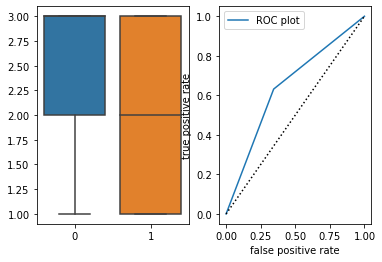

In [4]:
compare((np.array(titanic['pclass'])),np.array(titanic['survived']),plot=True)

# 5.Applying the function-fare

Overfitting, change a method
0.7395209580838323
0.6681614349775785


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


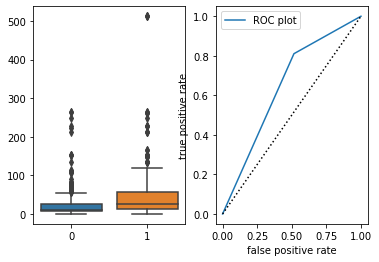

In [7]:
compare((np.array(titanic['fare'])),np.array(titanic['survived']),plot=True)

# From this output we can see that for fare our decision tree method does not work so we changed it. 
#The reason for its overfitting might be the case that the outliers in the dataset according to the boxplot.
# The test prediction is the same for both predictor and it could be that the fare to some degree decides the class that you can buy.
#I find no difference but would recommend fare for Pat to consider in his trip.